In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from loaders import *
from workloads import *
from utils import *

In [2]:
def get_zero_cycles_hops(workloads): 
    hops = []
    cycles = []
    cycles_best = []
        
    for workload in workloads:
        zero_config = get_zero_config(workload)
        zero_result = run_timeloop_model(
            zero_config,
            architecture='designs/data_parallel/arch.yaml',
            mapping='designs/data_parallel/map.yaml',
            problem='layer_shapes/workload.yaml'
        )

        hops.append(get_zero_network_hops(workload))
        cycles.append(get_zero_cycles(zero_result, workload))
        cycles_best.append(zero_result.cycles)

    return hops, cycles, cycles_best

In [3]:
hops, cycles, cycles_best = get_zero_cycles_hops(workloads)

[INFO] 2025-04-16 03:16:25,550 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-16 03:16:32,715 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-16 03:16:39,861 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-16 03:16:46,963 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-16 03:16:54,171 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-16 03:17:01,279 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-16 03:17:08,445 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-16 03:17:15,609 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-16 03:17:22,813 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-16 03:17:29,996 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


In [4]:
def plot_result(hops, cycles, cycles_best, bound=True, no_bound=True):
    if no_bound:
        plt.scatter(hops, cycles_best, color='red', label='no network bound')
    if bound:
        plt.scatter(hops, cycles, color='blue', label='with network bound')
        
    plt.xlabel('Network Hops')
    plt.ylabel('Cycles')
    plt.legend()
    plt.title('Cycles vs Network Hops Plot')
    
    hop_line = np.linspace(min(hops), max(hops), 100)
    cycle_line = (1 / THRESHOLD) * hop_line
    plt.plot(hop_line, cycle_line, color='black', linestyle='--', label=f'network_hops = {THRESHOLD} x cycles')
    plt.show()

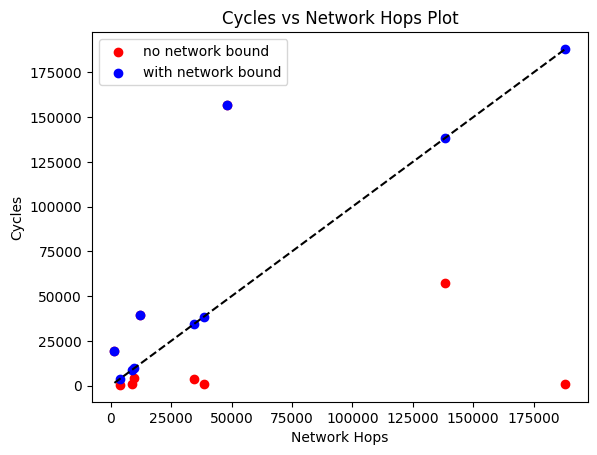

In [5]:
plot_result(hops, cycles, cycles_best, True, True)

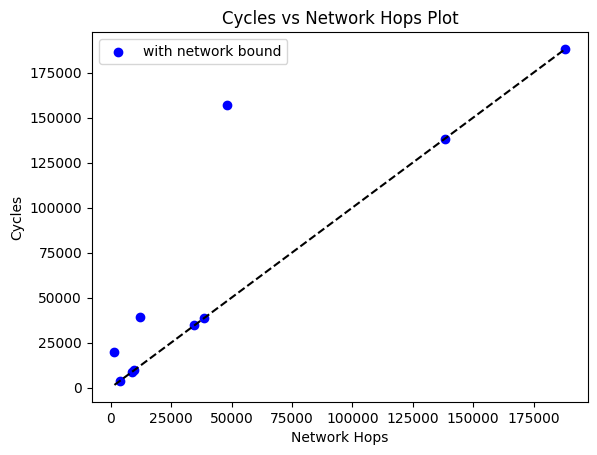

In [6]:
plot_result(hops, cycles, cycles_best, True, False)

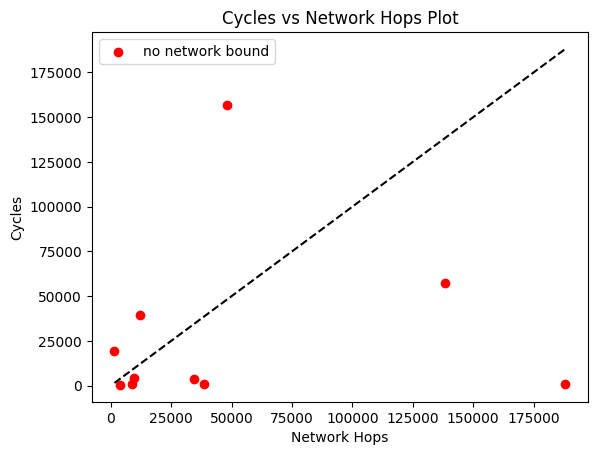

In [7]:
plot_result(hops, cycles, cycles_best, False, True)